In [93]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [94]:
import numpy as np
import h5py
#from chainconsumer import ChainConsumer
from corner import corner

In [95]:
obs = 'ds'

if obs == 'wp':
    idx = 0
else:
    idx = 1

In [96]:
fname = '/u/ki/swmclau2/des/SherlockPearceMCMC/HOD_wp_ds_rmin_None_HOD.hdf5'

In [97]:
f = h5py.File(fname, 'r')

In [98]:
f.attrs.keys()

[u'chain_fixed_params',
 u'cov',
 u'dlogz',
 u'emu_cov_fname',
 u'emu_hps',
 u'emu_type',
 u'fixed_params',
 u'mcmc_type',
 u'nburn',
 u'nlive',
 u'nsteps',
 u'nwalkers',
 u'obs',
 u'param_names',
 u'seed',
 u'sim',
 u'training_file',
 u'true_cov_fname',
 u'true_data_fname']

In [99]:
from ast import literal_eval

In [100]:
from pearce.emulator import LemonPepperWet
tf = f.attrs['training_file']
fixed_params = literal_eval(f.attrs['fixed_params'])
emu_hps = literal_eval(f.attrs['emu_hps'])

In [101]:
tf

array(['/home/users/swmclau2/scratch/wp_zheng07/PearceWpCosmo.hdf5',
       '/home/users/swmclau2/scratch/ds_zheng07/PearceDsCosmo.hdf5'],
      dtype='|S58')

In [102]:
emu = LemonPepperWet('/u/ki/swmclau2/des/%s_zheng07/PearceDsCosmo.hdf5'%obs, fixed_params = fixed_params, hyperparams = emu_hps)

In [103]:
emu.obs

'ds'

In [104]:
chain_pnames = f.attrs['param_names']

In [105]:
n_walkers = f.attrs['nwalkers']

In [106]:
chain = f['chain'][()]#[n_walkers*1000:n_walkers*6000]

In [107]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [108]:
n_burn = 49000
chain = chain[n_walkers*n_burn:]#, :]

In [109]:
chain = chain[np.all(chain!=0.0, axis = 1), :]

In [110]:
print chain.shape, chain.shape[0]/n_walkers

(200000, 12) 1000


In [111]:
MAP = chain.mean(axis = 0)
print MAP

[ 2.2100806e-02  1.1676930e-01 -1.0303556e+00  9.6384913e-01
  3.0928123e+00  6.5362617e+01  3.4123785e+00  1.4258521e+01
  1.3172162e+01  2.5067803e-01  1.0673476e+00  7.1900249e-01]


In [112]:
chain_pnames

array(['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff', 'logM1',
       'logM0', 'sigma_logM', 'alpha', 'conc_gal_bias'], dtype='|S13')

In [113]:
low_om_idxs = chain[:,1] < 0.116
med_om_idxs = np.logical_and(chain[:,1] < 0.117, chain[:,1]>0.113)


low_om_chain = chain[low_om_idxs]
high_om_chain = chain[~low_om_idxs]
med_om_chain = chain[med_om_idxs]

In [114]:
MAP_dict = dict(zip(emu.get_param_names(), MAP))
low_om_MAP_dict = dict(zip(emu.get_param_names(), low_om_chain.mean(axis =0)))
high_om_MAP_dict = dict(zip(emu.get_param_names(), high_om_chain.mean(axis=0)))
med_om_MAP_dict = dict(zip(emu.get_param_names(), med_om_chain.mean(axis=0)))

In [115]:
MAP_dict

{'H0': 65.36262,
 'Neff': 3.4123785,
 'alpha': 1.0673476,
 'conc_gal_bias': 0.7190025,
 'ln10As': 3.0928123,
 'logM0': 13.172162,
 'logM1': 14.258521,
 'ns': 0.9638491,
 'ombh2': 0.022100806,
 'omch2': 0.1167693,
 'sigma_logM': 0.25067803,
 'w0': -1.0303556}

In [116]:
fixed_params = eval(f.attrs['chain_fixed_params'])

In [117]:
MAP_dict.update(fixed_params)

In [118]:
MAP_dict

{'H0': 65.36262,
 'Neff': 3.4123785,
 'alpha': 1.0673476,
 'conc_gal_bias': 0.7190025,
 'ln10As': 3.0928123,
 'logM0': 13.172162,
 'logM1': 14.258521,
 'ns': 0.9638491,
 'ombh2': 0.022100806,
 'omch2': 0.1167693,
 'sigma_logM': 0.25067803,
 'w0': -1.0303556}

In [119]:
MAP_pred = emu.emulate_wrt_r(MAP_dict, r_bin_centers=emu.scale_bin_centers).squeeze()
#low_om_pred = emu.emulate_wrt_r(low_om_MAP_dict)[0]
#high_om_pred = emu.emulate_wrt_r(high_om_MAP_dict)[0]

In [120]:
MAP_pred

array([ 2.16416461,  2.11650462,  2.03482306,  1.93304396,  1.81565921,
        1.691556  ,  1.55849392,  1.41691554,  1.26443803,  1.09788805,
        0.91749089,  0.73341392,  0.55976308,  0.41020535,  0.28154122,
        0.17129448,  0.06766872, -0.03752494])

In [121]:
param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$', r'$n_s$', r'$\ln(10A_s)$', r'$H_0$', r'$N_{eff}$',\
               r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\log(M_1)$',r'$\alpha$']
               # r'$\rho_{sat}$',r'$\rho_{cen}$', r'$\log(M_1)$',r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\alpha$' ]

In [122]:
hod_param_names = [r'$\log(M_0)$',r'$\sigma_{\log M }$',r'$\log(M_1)$' ,r'$\alpha$' ]
cosmo_param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$', r'$n_s$', r'$\ln(10A_s)$', r'$H_0$', r'$N_{eff}$' ]

In [123]:
hod_idxs = np.array(range(len(cosmo_param_names), len(cosmo_param_names)+len(hod_param_names)))
cosmo_idxs = np.array(range(len(cosmo_param_names)))

In [124]:
if chain.shape[1] == 7:
    cosmo_chain = chain
else:
    hod_chain = chain[:,-4:]#[:, hod_idxs]
    cosmo_chain = chain[:,:-4]#[:, cosmo_idxs]

In [125]:
from pearce.mocks import cat_dict
cosmo_params = {}

In [126]:
cosmo_params['boxno'] = 1
cosmo_params['realization'] = 0

In [127]:
cat = cat_dict['testbox'](**cosmo_params)#construct the specified catalog!

In [128]:
cpv = cat._get_cosmo_param_names_vals()

cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

In [129]:
import yaml
with open('/u/ki/swmclau2/Git/pearce/bin/mcmc/config/HOD_wp_ds_rmin_None_HOD.yaml') as yamlfile:
    cfg = yaml.load(yamlfile)
    sim_cfg = cfg['data']['sim']
    obs_cfg = cfg['data']['obs']

In [130]:
r_bins = obs_cfg['rbins']

In [131]:
true_param_dict = cat_val_dict.copy()
hod_params = {'alpha': 1.083, 'conc_gal_bias': 1.0, 'logM0': 13.2,'logM1': 14.2, 'sigma_logM': 0.2}#sim_info['hod_params']

#hod_params['mean_occupation_centrals_assembias_corr1'] =0.0
#hod_params['mean_occupation_satellites_assembias_corr1'] =0.0

for hp, hv in hod_params.iteritems():
    if hp == 'logMmin':
        continue
    true_param_dict[hp] = hv

true_param_dict['conc_gal_bias'] = 1.0
true_pred = emu.emulate_wrt_r(true_param_dict)[0]

In [132]:
f['data']

<HDF5 dataset "data": shape (2, 18), type "<f8">

In [133]:
true_data = f['data'][idx]

In [134]:
true_data

array([142.07055415, 125.36222848, 103.00123614,  80.78440022,
        61.34877064,  45.34181648,  32.86317666,  23.20920992,
        15.90243135,  10.67781224,   6.94123681,   4.52700817,
         3.08310536,   2.19672846,   1.65761567,   1.32605013,
         1.05937352,   0.81363773])

In [135]:
rbc = emu.scale_bin_centers#[-len(emu.scale_bin_centers):]

In [136]:
if obs == 'wp':
    cov = f['cov'][:len(r_bins)-1][:, :len(r_bins)-1]
else:
    cov = f['cov'][len(r_bins)-1:][:, len(r_bins)-1:]

yerr = np.sqrt(np.diag(cov))[-len(rbc):]

In [137]:
yerr

array([3.89166303, 3.53048346, 2.99295716, 2.34505852, 1.84542799,
       1.38661878, 1.01137786, 0.70144696, 0.49340637, 0.36470645,
       0.27175743, 0.20433438, 0.15172411, 0.11886243, 0.09431151,
       0.07946101, 0.07196712, 0.0684937 ])

In [138]:
yerr/true_data[-len(emu.scale_bin_centers):]

array([0.02739247, 0.02816226, 0.02905749, 0.02902861, 0.03008093,
       0.03058146, 0.03077541, 0.03022278, 0.0310271 , 0.03415554,
       0.03915115, 0.04513674, 0.04921146, 0.05410884, 0.05689589,
       0.05992308, 0.06793366, 0.08418206])

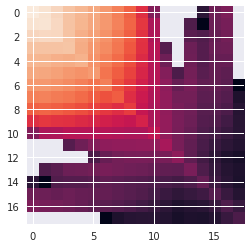

In [139]:
plt.imshow(np.log10(cov) )

In [140]:
np.sqrt(np.diag(cov))

array([3.89166303, 3.53048346, 2.99295716, 2.34505852, 1.84542799,
       1.38661878, 1.01137786, 0.70144696, 0.49340637, 0.36470645,
       0.27175743, 0.20433438, 0.15172411, 0.11886243, 0.09431151,
       0.07946101, 0.07196712, 0.0684937 ])

In [141]:
np.sqrt(np.diag(f['cov'][()]))#.reshape((2,18))

array([2.00649767e+02, 1.57480055e+02, 1.28415185e+02, 1.12737547e+02,
       9.71384334e+01, 8.06208497e+01, 6.45537066e+01, 4.91696419e+01,
       3.45138794e+01, 2.20857766e+01, 1.23689818e+01, 6.03034709e+00,
       2.98785302e+00, 2.08923712e+00, 1.63010276e+00, 1.24582206e+00,
       9.74488539e-01, 7.89157062e-01, 3.89166303e+00, 3.53048346e+00,
       2.99295716e+00, 2.34505852e+00, 1.84542799e+00, 1.38661878e+00,
       1.01137786e+00, 7.01446959e-01, 4.93406371e-01, 3.64706446e-01,
       2.71757430e-01, 2.04334383e-01, 1.51724113e-01, 1.18862426e-01,
       9.43115135e-02, 7.94610145e-02, 7.19671247e-02, 6.84937013e-02])

In [142]:
bounds = {pname: emu.get_param_bounds(pname) for pname in emu.get_param_names()[:-4]}

In [143]:
bounds

{'H0': (61.69472, 74.76751999999999),
 'Neff': (2.62125, 4.27875),
 'ln10As': (3.0009, 3.179424),
 'logM1': (13.7, 14.7),
 'ns': (0.9278462, 0.9974495999999999),
 'ombh2': (0.02066455, 0.02371239),
 'omch2': (0.1012181, 0.13177679999999997),
 'w0': (-1.399921, -0.5658486)}

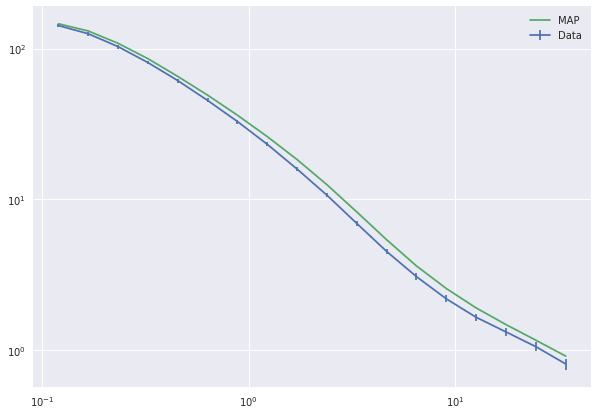

In [144]:
fig = plt.figure(figsize = (10,7))
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data')
#plt.plot(rbc, 10**true_pred, label = 'True')
plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)

plt.loglog()
plt.legend(loc='best')
plt.show();

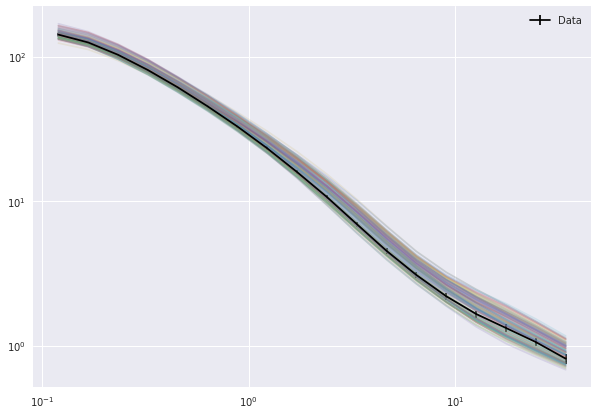

In [145]:
fig = plt.figure(figsize = (10,7))
chain_samples = np.random.choice(chain.shape[0], size = 100, replace = False)
for sample in chain[chain_samples]:
    param_dict = dict(zip(emu.get_param_names(), sample))
    param_dict.update(fixed_params)
    plt.plot(rbc, 10**emu.emulate_wrt_r(param_dict)[0], alpha = 0.2)
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data', color = 'k')
#plt.plot(rbc, 10**true_pred, label = 'True')
#plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)

plt.loglog()
plt.legend(loc='best')
plt.show();

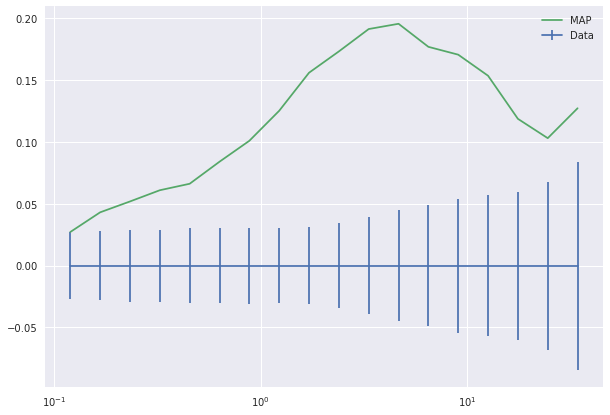

In [146]:
fig = plt.figure(figsize = (10,7))
plt.errorbar(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.plot(rbc, (10**true_pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'True')
plt.plot(rbc, (10**MAP_pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'MAP')
plt.xscale('log')
plt.legend(loc='best')
plt.show();

In [147]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias']

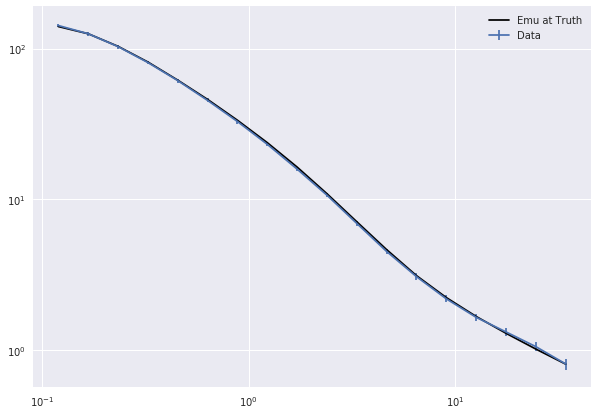

In [148]:
fig = plt.figure(figsize=(10,7))

pred = emu.emulate_wrt_r(true_param_dict, r_bin_centers=emu.scale_bin_centers)[0]
plt.plot(rbc, 10**pred,label = 'Emu at Truth', color ='k')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Sim' )
plt.errorbar(rbc, true_data[-len(rbc):], yerr=yerr, label = 'Data')
plt.loglog()
plt.legend(loc='best')
plt.show();

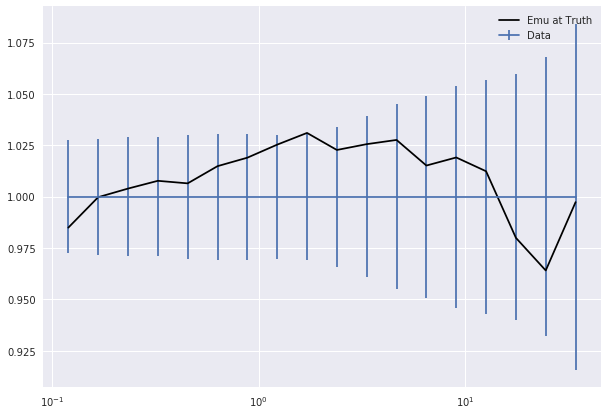

In [149]:
fig = plt.figure(figsize=(10,7))

pred = emu.emulate_wrt_r(true_param_dict)[0]
plt.plot(rbc, 10**pred/true_data[-len(rbc):],label = 'Emu at Truth', color ='k')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Sim' )
plt.errorbar(rbc, np.ones_like(rbc), yerr=yerr/true_data[-len(rbc):], label = 'Data')
plt.xscale('log')
plt.legend(loc='best')
plt.show();

In [150]:
N = 100
cmap = sns.color_palette("BrBG_d", N)

In [151]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias']

In [152]:
true_param_dict

{'H0': 65.7317,
 'Neff': 3.2,
 'alpha': 1.083,
 'conc_gal_bias': 1.0,
 'ln10As': 3.06395,
 'logM0': 13.2,
 'logM1': 14.2,
 'ns': 0.971515,
 'ombh2': 0.022762900000000003,
 'omch2': 0.11283,
 'sigma_logM': 0.2,
 'w0': -0.861513}

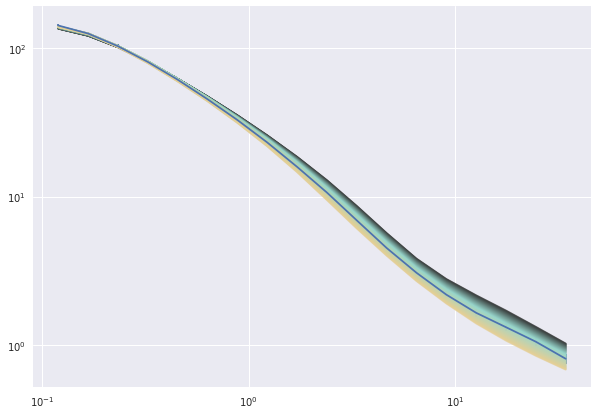

In [157]:
fig = plt.figure(figsize=(10,7))
varied_pname = 'w0'
lower, upper = emu.get_param_bounds(varied_pname)
#lower, upper = 0.11, 0.12
for c, val in zip(cmap, np.linspace(lower, upper, N) ):
    param_dict = true_param_dict.copy()
    #param_dict = MAP_dict.copy()

    param_dict[varied_pname] = val
    #h_factor = (val/100)**3
    #h_factor = (100/val)
    h_factor = 1
    pred = emu.emulate_wrt_r(param_dict)[0]
    plt.plot(rbc, h_factor*(10**pred), alpha = 0.5,label = val, color =c)
    
plt.errorbar(rbc, true_data[-len(rbc):], yerr=yerr, label = 'Data')
plt.loglog()
#plt.legend(loc='best')
plt.show();

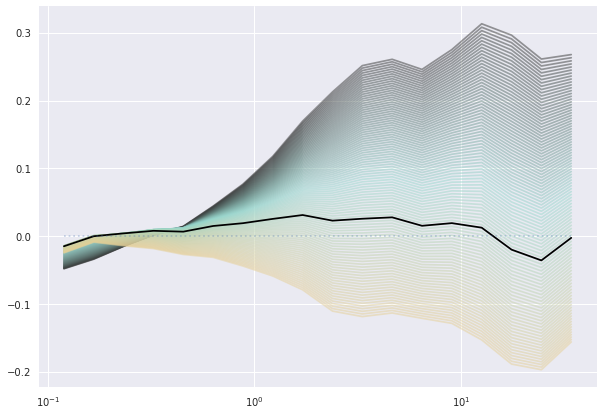

In [158]:
fig = plt.figure(figsize=(10,7))
#varied_pname = 'Neff'
#lower, upper = emu.get_param_bounds(varied_pname)
i = 0
for c, val in zip(cmap, np.linspace(lower, upper, N) ):
    #print i, val
    i+=1
    param_dict = true_param_dict.copy()
    #param_dict = MAP_dict.copy()
    #param_dict = high_om_MAP_dict.copy()
    param_dict[varied_pname] = val
    #h_factor = (val/100)**3
    #h_factor = 1#(100/val)
    h_factor =1
    pred = emu.emulate_wrt_r(param_dict)[0]
    plt.plot(rbc, ((10**pred)*h_factor-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):],\
             alpha = 0.5,label = val, color =c)
    
pred = emu.emulate_wrt_r(true_param_dict)[0]
true_h_factor = 1#(true_param_dict['H0']/100)**3
#true_h_factor = (100/true_param_dict['H0'])
plt.plot(rbc, ((10**pred)*true_h_factor-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'Truth', color = 'k')    
plt.plot(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]),  alpha = 0.3, ls = ':')
#plt.loglog()
plt.xscale('log')
#plt.legend(loc='best')
plt.show();

In [155]:
bin = 2
#emu._kernels[bin][0].linear.variances

In [156]:
emu._kernels[bin][0].rbf.lengthscale

AttributeError: 'LemonPepperWet' object has no attribute '_kernels'

In [ ]:
x = emu._x1_std*emu.x1+emu._x1_mean

In [ ]:
emu.get_param_names()

In [ ]:
np.argmin(abs(x[:,1]- 0.11386))

In [ ]:
plt.plot(emu.scale_bin_centers, emu.y[:, 4, 100]+emu._y_mean)
plt.xscale('log')

In [ ]:
x1_idx, x2_idx = 10, 100
param_dict = dict(zip(emu.get_param_names(), np.hstack([emu.x1[x1_idx]*emu._x1_std+emu._x1_mean,\
                                                        emu.x2[x2_idx]*emu._x2_std+emu._x2_mean])))

In [ ]:
param_dict

In [ ]:
data = emu.y[:, x1_idx, x2_idx]+emu._y_mean
#plt.plot(emu.scale_bin_centers, )
plt.plot(emu.scale_bin_centers, emu.emulate_wrt_r(param_dict)[0]/data)
plt.errorbar(emu.scale_bin_centers, np.ones_like(data))#, yerr=yerr/data)
plt.xscale('log')